# 预处理

## result补全

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

import numpy as np

In [52]:
#读取csv文件
data_info = pd.read_csv('user_info.csv')
data_result = pd.read_csv('result.csv')
data_result_all = pd.read_csv('result_all.csv')

In [3]:
data_info.head()

,user_id,first_order_time,first_order_price,age_month,city_num,platform_num,model_num,app_num
0,2000001555945280,2018/12/23 11:44,0.0,32,广州,9.2969,11.2707,1
1,2000001556645228,2019/1/11 9:46,0.0,127,徐州,9.2969,4.9689,1
2,2000001558047804,2018/12/26 11:04,0.0,92,NaN,9.2969,6.6392,1
3,2000001558146467,2018/12/31 8:47,0.0,83,NaN,9.2969,12.2222,1
4,2000001558146878,2019/1/28 1:53,0.0,47,NaN,13.5570,10.3925,1


In [31]:
data_info.shape

(135968, 8)

In [12]:
userId_info=data_info.loc[:,"user_id"]

In [64]:
userId_result=data_result.loc[:,"user_id"]

In [18]:
userId_info.shape

(135968,)

In [35]:
userId_result.shape

(0, 2)

In [54]:
#对一个空白csv做初始化，全赋值为0
j = 0
for i in userId_info :
    data_result_all.loc[j]=[i,0]
    j+=1 
        

In [55]:
data_result_all.head()

,user_id,result
0,2000001555945280,0
1,2000001556645228,0
2,2000001558047804,0
3,2000001558146467,0
4,2000001558146878,0


In [67]:
# 对result.csv中值为1的数据赋值到result_all中
for i in userId_info :
    for k in userId_result :
        if i == k :
            data_result_all.loc[data_result_all['user_id']==i] =[i,1]
            

In [68]:
data_result_all

,user_id,result
0,2000001555945280,0
1,2000001556645228,0
2,2000001558047804,0
3,2000001558146467,0
4,2000001558146878,0
...,...,...
135963,2000002945827404,0
135964,2000002945862051,0
135965,2000002945866461,0
135966,2000002945873156,0


In [66]:
userId_info

0         2000001555945280
1         2000001556645228
2         2000001558047804
3         2000001558146467
4         2000001558146878
                ...       
135963    2000002945827404
135964    2000002945862051
135965    2000002945866461
135966    2000002945873156
135967    2000002946803184
Name: user_id, Length: 135968, dtype: int64

In [70]:
#保存csv文件
data_result_all.to_csv('result_all.csv')

In [72]:
data_result_all.head(26)

,user_id,result
0,2000001555945280,0
1,2000001556645228,0
2,2000001558047804,0
3,2000001558146467,0
4,2000001558146878,0
5,2000001558147371,0
6,2000001559045233,0
7,2000001559245920,0
8,2000001559246037,0
9,2000001559247825,0


In [73]:
data_result

,user_id,result
0,2000001563151338,1
1,2000001563163750,1
2,2000001563266119,1
3,2000001566046975,1
4,2000001566153564,1
...,...,...
4634,2000002940317890,1
4635,2000002941209916,1
4636,2000002941212854,1
4637,2000002943617210,1


## 合并表格

In [36]:
import pandas as pd
import csv
import numpy as np


In [ ]:
def read(root):
    file = './' + root + '.csv'
    df=pd.read_csv(file,encoding='utf-8')
    labels = list(df.columns.values)
    print(labels)
    print(df.shape[0])
    return df

if __name__ == "__main__":
    login_data=read('login_day')
    user_data=read('user_info')
    visit_data=read('visit_info')
    result_data=read('result_all')
    print(visit_data)

In [ ]:
df=user_data.merge(login_data,on='user_id',how='left')

df1=df.merge(visit_data,on='user_id',how='left')
df2=df.merge(result_data,on='user_id',how='left')
#print(df1)
df2.to_csv('./final.csv',encoding='utf-8')

In [ ]:
df=pd.merge(user_data,login_data,on='user_id',how='left')
df1=pd.merge(df,visit_data,on='user_id',how='left')
df2=pd.merge(df1,result_data,on='user_id',how='left')
df2=df2.drop_duplicates(subset=['user_id'])
#print(df2)
df2.to_csv('./final1.csv',encoding='gbk')

## 删除噪声数据

## 相关性分析，删去相关性较小的列 ， 画相关性热力图

In [2]:
final = pd.read_csv('final2.csv')

In [3]:
final=final.drop(final.columns[0],axis=1)

In [4]:
final.describe()

,user_id,first_order_price,age_month,platform_num,model_num,app_num,login_day,login_diff_time,distance_day,login_time,...,next_nize,answer_task,chapter_module,course_tab,slide_subscribe,baby_info,click_notunlocked,share,click_dialog,result
count,1.259890e+05,125989.000000,125989.000000,125989.000000,125989.000000,125989.0,125237.000000,125237.000000,125237.000000,125237.000000,...,125237.000000,125237.000000,125237.000000,125237.000000,125237.000000,125237.000000,125237.000000,125237.000000,125237.000000,125989.000000
mean,2.000000e+15,1.337994,66.492726,10.252294,9.429723,1.0,4.184626,1.098557,136.050943,38.015586,...,22.890959,12.383122,10.240145,14.256090,3.882862,4.239194,1.828341,4.844607,0.977714,0.034328
std,0.000000e+00,10.254184,206.767783,1.776885,4.456437,0.0,2.373957,1.991973,135.439341,57.123750,...,30.032116,16.144678,16.190697,27.244997,4.791130,3.207711,3.284217,6.855109,0.863097,0.182072
min,2.000000e+15,0.000000,0.000000,9.296900,0.000000,1.0,-1.000000,-1.000000,-1275.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+15,0.000000,51.000000,9.296900,6.346200,1.0,3.000000,0.750000,38.000000,7.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000e+15,0.000000,63.000000,9.296900,8.928600,1.0,4.000000,1.000000,84.000000,21.000000,...,17.000000,7.000000,5.000000,4.000000,3.000000,5.000000,1.000000,2.000000,1.000000,0.000000
75%,2.000000e+15,0.000000,78.000000,9.296900,11.494300,1.0,6.000000,1.200000,179.000000,44.000000,...,35.000000,19.000000,13.000000,16.000000,5.000000,5.000000,2.000000,8.000000,1.000000,0.000000
max,2.000000e+15,2099.000000,24245.000000,13.557000,100.000000,1.0,108.000000,135.000000,6588.000000,1480.000000,...,1271.000000,760.000000,1157.000000,1743.000000,261.000000,229.000000,83.000000,249.000000,119.000000,1.000000


In [5]:
# 皮尔逊相关系数，相关性分析
corr =final.corr()
corr['result'].sort_values(ascending=False)

result                     1.000000
course_order_num           0.296859
coupon                     0.279601
study_num                  0.205000
chinese_subscribe_num      0.155451
math_subscribe_num         0.147275
login_time                 0.088121
video_read                 0.083710
task                       0.080249
login_diff_time            0.080127
model_num                  0.078561
main_home                  0.076151
launch_time                0.072627
share                      0.070719
main_home2                 0.070020
video_play                 0.065650
next_nize                  0.063888
schoolreportpage           0.062364
ppt                        0.059898
click_dialog               0.054485
course_tab                 0.052584
finish_num                 0.047071
mainpage                   0.045417
slide_subscribe            0.045103
chapter_module             0.043342
coupon_visit               0.042488
platform_num               0.038886
main_mime                  0

In [6]:
final

,user_id,first_order_time,first_order_price,age_month,platform_num,model_num,app_num,login_day,login_diff_time,distance_day,...,next_nize,answer_task,chapter_module,course_tab,slide_subscribe,baby_info,click_notunlocked,share,click_dialog,result
0,2.000000e+15,2018/12/23 11:44,0.00,32,9.2969,11.2707,1,7.0,6.86,131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2.000000e+15,2019/1/11 9:46,0.00,127,9.2969,4.9689,1,4.0,1.00,81.0,...,7.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0
2,2.000000e+15,2018/12/26 11:04,0.00,92,9.2969,6.6392,1,1.0,0.00,179.0,...,0.0,4.0,0.0,1.0,2.0,5.0,0.0,0.0,1.0,0
3,2.000000e+15,2018/12/31 8:47,0.00,83,9.2969,12.2222,1,6.0,1.00,32.0,...,0.0,20.0,11.0,2.0,9.0,5.0,5.0,7.0,1.0,0
4,2.000000e+15,2019/1/28 1:53,0.00,47,13.5570,10.3925,1,4.0,1.75,361.0,...,18.0,0.0,14.0,16.0,2.0,3.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125984,2.000000e+15,2019/5/13 20:20,0.00,60,13.5570,10.8966,1,-1.0,-1.00,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
125985,2.000000e+15,2019/5/13 21:35,0.00,60,13.5570,8.1782,1,-1.0,-1.00,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
125986,2.000000e+15,2019/5/13 21:46,0.00,66,9.2969,6.5617,1,2.0,0.50,0.0,...,9.0,1.0,0.0,28.0,0.0,0.0,0.0,1.0,2.0,0
125987,2.000000e+15,2019/5/13 22:10,0.00,24,9.2969,15.3061,1,1.0,0.00,24.0,...,0.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0


## 选取相关性较高的两个参数做线性回归分析作图

In [7]:
final =final.dropna(axis=0,how='any')
data = final[['course_order_num','coupon']]
label = final['result']

In [8]:
data.head()

,course_order_num,coupon
0,4.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0


In [9]:
label.head()

0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [10]:
# 选取course_order_num、coupon为特征做训练集和测试集划分
x_train,x_test,y_train,y_test = train_test_split(data,label,test_size=0.3)

In [11]:
x_train.head()

,course_order_num,coupon
89471,0.0,0.0
66973,0.0,0.0
11396,0.0,0.0
25760,0.0,1.0
41848,0.0,0.0


In [12]:
y_train.head()

89471    0
66973    0
11396    0
25760    0
41848    0
Name: result, dtype: int64

In [13]:
x_test.head()

,course_order_num,coupon
115980,0.0,0.0
113149,0.0,0.0
105334,0.0,0.0
45890,0.0,0.0
121282,0.0,0.0


In [14]:
y_test.head()

115980    0
113149    0
105334    0
45890     0
121282    0
Name: result, dtype: int64

In [15]:
# 支持向量机做分类
svm = SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [16]:
# 交叉验证
cross_val_score(svm,x_train,y_train,cv=3,scoring='accuracy')

array([0.96567655, 0.96564232, 0.96567537])

In [17]:
# 打印两个特征训练的模型 得分
print('Test score: %.4f' % svm.score(x_test, y_test))
print('Train score: %.4f' % svm.score(x_train, y_train))

Test score: 0.9650
Train score: 0.9657


In [18]:
x_predict=svm.predict(x_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, x_predict))#F1-SCORE是测试准确度的量度

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     36257
           1       0.00      0.00      0.00      1315

    accuracy                           0.97     37572
   macro avg       0.48      0.50      0.49     37572
weighted avg       0.93      0.97      0.95     37572



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 选取特征，提取特征

In [12]:
new_data = pd.read_csv('new_data2.csv')

In [13]:
new_data.head()

,first_order_time,first_order_price,age_month,city_num,platform_num,model_num,login_day,login_diff_time,distance_day,login_time,...,next_size,answer_task,chapter_module,course_tab,slide_subscribe,click_notunlocked,share,click_dialog,result,area_num
0,2018/12/23 11:44,0.0,32,广州,9.2969,11.2707,7,6.86,131,1,...,0,0,0,0,0,0,0,0,0,first
1,2019/1/11 9:46,0.0,127,徐州,9.2969,4.9689,4,1.00,81,3,...,7,3,0,0,0,0,0,1,0,second
2,2018/12/26 11:04,0.0,92,郑州,9.2969,6.6392,1,0.00,179,3,...,0,4,0,1,2,0,0,1,0,first
3,2018/12/31 8:47,0.0,83,大连,9.2969,12.2222,6,1.00,32,24,...,0,20,11,2,9,5,7,1,0,first
4,2019/1/28 1:53,0.0,47,安庆,13.5570,10.3925,4,1.75,361,39,...,18,0,14,16,2,0,0,1,0,third


In [14]:
#删除部分无关特征列
new_data = new_data.drop(new_data.columns[0],axis=1)
new_data = new_data.drop(new_data.columns[2],axis=1)

In [15]:
#选取特征列 选取标签列
x_attr=new_data.drop(new_data.columns[-2],axis=1)
y_attr=new_data['result']

In [16]:
class_mapping = {'first':1, 'second':2,'third':3,'fourth':4}
x_attr['area_num'] = x_attr['area_num'].map(class_mapping)

In [17]:
x_attr

,first_order_price,age_month,platform_num,model_num,login_day,login_diff_time,distance_day,login_time,launch_time,chinese_subscribe_num,...,video_read,next_size,answer_task,chapter_module,course_tab,slide_subscribe,click_notunlocked,share,click_dialog,area_num
0,0.00,32,9.2969,11.2707,7,6.86,131,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0.00,127,9.2969,4.9689,4,1.00,81,3,1,1,...,4,7,3,0,0,0,0,0,1,2
2,0.00,92,9.2969,6.6392,1,0.00,179,3,0,1,...,0,0,4,0,1,2,0,0,1,1
3,0.00,83,9.2969,12.2222,6,1.00,32,24,3,0,...,48,0,20,11,2,9,5,7,1,1
4,0.00,47,13.5570,10.3925,4,1.75,361,39,0,0,...,17,18,0,14,16,2,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119441,0.00,66,13.5570,12.0343,1,0.00,24,440,0,0,...,6,0,0,13,4,2,1,0,0,3
119442,0.00,64,13.5570,12.9528,2,0.50,0,246,1,1,...,0,0,0,0,0,3,0,0,0,4
119443,0.00,66,9.2969,6.5617,2,0.50,0,21,0,0,...,2,9,1,0,28,0,0,1,2,1
119444,0.00,24,9.2969,15.3061,1,0.00,24,1,0,0,...,0,0,2,1,3,0,0,0,0,2


In [18]:
y_attr

0         0
1         0
2         0
3         0
4         0
         ..
119441    0
119442    0
119443    0
119444    0
119445    0
Name: result, Length: 119446, dtype: int64

In [11]:
# filter 过滤法   方差、相关性

# Embedded嵌入法   

# Wrapper包装法
#选取十个特征

X, y = x_attr,y_attr
X.shape      # (n, 46)
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  #(n, 9)


D:\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(119446, 9)

In [13]:
#选取过程中个指标结果
clf.feature_importances_  

array([1.87884374e-02, 1.83514945e-02, 8.68865882e-03, 2.29735185e-02,
       2.92872832e-02, 2.90030681e-02, 8.32255818e-02, 2.01773486e-02,
       1.57323759e-02, 2.51666404e-02, 1.83490890e-02, 6.77107676e-05,
       5.91949084e-05, 2.90040546e-02, 2.35169371e-02, 3.95636743e-02,
       1.77545292e-01, 7.69119167e-02, 1.82268945e-02, 1.72973029e-02,
       1.64281252e-02, 1.77038214e-02, 1.26796982e-02, 1.32377285e-02,
       1.20917855e-02, 5.84004905e-03, 1.22767779e-02, 1.67277670e-02,
       7.03964260e-05, 9.53876399e-03, 1.54754695e-02, 1.70703195e-02,
       1.61714233e-02, 1.78603989e-02, 1.55666087e-02, 1.65144640e-02,
       1.75710449e-02, 1.66182383e-02, 1.61829060e-02, 1.42958054e-02,
       1.95280743e-02, 1.43149885e-02, 1.42988712e-02])

In [14]:
# 选出的特征的index结果
index=model.get_support()
index

array([False, False, False, False,  True,  True,  True, False, False,
        True, False, False, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [15]:
# 将bool数组转化为 数组获取index
array=[]
j=0
for i in index :
    if i==True :
        array.append(j)
    j+=1
array

[4, 5, 6, 9, 13, 14, 15, 16, 17]

In [16]:
array.append()

[4, 5, 6, 9, 13, 14, 15, 16, 17]

In [17]:
# 查看九个选出的特征
x_attr.iloc[ : ,array ]  

,login_day,login_diff_time,distance_day,chinese_subscribe_num,learn_num,finish_num,study_num,coupon,course_order_num
0,7,6.86,131,1,0,0,0,0,4
1,4,1.00,81,1,1,0,0,0,0
2,1,0.00,179,1,0,0,0,0,0
3,6,1.00,32,0,5,5,0,0,1
4,4,1.75,361,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
119441,1,0.00,24,0,3,8,0,0,0
119442,2,0.50,0,1,0,0,0,0,0
119443,2,0.50,0,0,1,1,0,0,0
119444,1,0.00,24,0,1,0,0,0,0


In [18]:
# 将特征表格保存
feature_csv=x_attr.iloc[ : ,array ]  
feature_csv.to_csv('feature.csv')

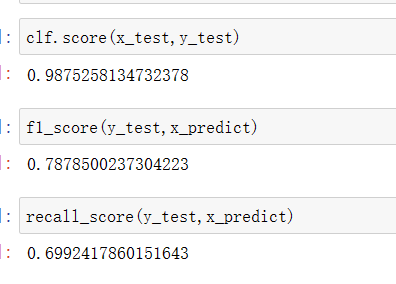

In [19]:
# 将特征对应标签保存
y_attr.to_csv('result_label.csv')

## 做用户画像 并对用户做分类

## 或者是无监督学习

In [23]:
X, y = x_attr,y_attr
tree = DecisionTreeClassifier()

tree.fit(X, y)

importances = pd.DataFrame({'importance': tree.feature_importances_, 'feature':X.columns}).sort_values('importance', ascending=False)
importances

,importance,feature
16,0.252870,coupon
6,0.245754,distance_day
5,0.089885,login_diff_time
17,0.042391,course_order_num
27,0.026240,coupon_visit
3,0.024507,model_num
4,0.022050,login_day
7,0.017848,login_time
13,0.016812,learn_num
19,0.015861,main_home2


In [34]:
# 18个特征
data = pd.read_csv('new_data2.csv')
attr = data[['coupon',
 'distance_day',
 'login_diff_time',
 'course_order_num',       
 'coupon_visit',
 'model_num',
 'login_day',
 'login_time',
 'learn_num',
 'main_home2',
 'age_month',
 'video_read',
 'main_home',
 'chinese_subscribe_num',
 'result']]

#  'study_num',
#  'login_diff_time',
#  'platform_num',
#  'first_order_price'

In [35]:
attr_x = attr.drop(attr.columns[-1],axis=1)
attr_y = attr['result']

In [36]:
attr_x

,coupon,distance_day,login_diff_time,course_order_num,coupon_visit,model_num,login_day,login_time,learn_num,main_home2,age_month,video_read,main_home,chinese_subscribe_num
0,0,131,6.86,4,0,11.2707,7,1,0,0,32,0,0,1
1,0,81,1.00,0,0,4.9689,4,3,1,13,127,4,17,1
2,0,179,0.00,0,0,6.6392,1,3,0,13,92,0,5,1
3,0,32,1.00,1,1,12.2222,6,24,5,43,83,48,72,0
4,0,361,1.75,0,0,10.3925,4,39,0,28,47,17,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119441,0,24,0.00,0,0,12.0343,1,440,3,4,66,6,0,0
119442,0,0,0.50,0,0,12.9528,2,246,0,17,64,0,1,1
119443,0,0,0.50,0,0,6.5617,2,21,1,52,66,2,36,0
119444,0,24,0.00,0,0,15.3061,1,1,1,7,24,0,8,0


In [37]:
attr_x.to_csv('feature1.csv')
attr_y.to_csv('result1.csv')

In [29]:
importances.to_csv('importances.csv')